DataFrame (first 5 rows):
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  

Model Evaluation:
Accuracy: 0.7594
Precision: 0.6933
Recall: 0.8525
F1 Score: 0.7647


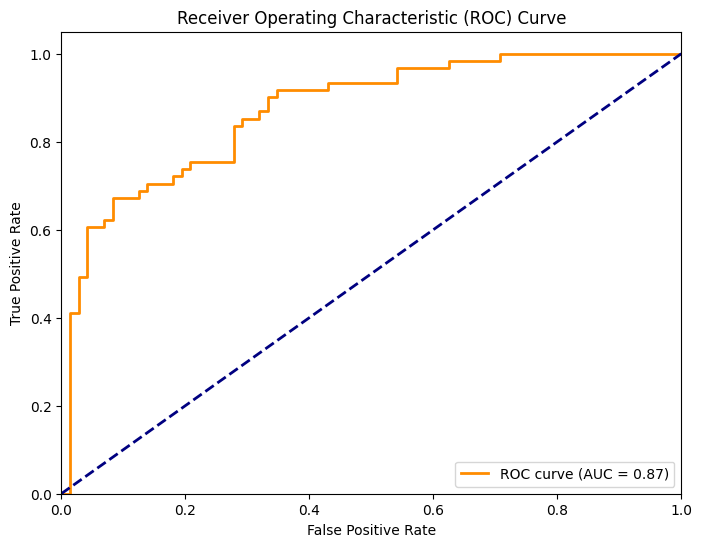

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

# Load the diabetes dataset from sklearn (for binary classification)
diabetes = load_diabetes()

# Create a DataFrame
data = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
target = diabetes.target

# Convert the regression task to a binary classification (for demonstration purposes)
# Let's assume a person has diabetes if the target value is greater than the median of the target
median = np.median(target)
binary_target = (target > median).astype(int)

# Show the first few rows of the DataFrame
print("DataFrame (first 5 rows):")
print(data.head())

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, binary_target, test_size=0.3, random_state=42)

# Standardize the features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Support Vector Classifier (SVC) model with RBF kernel
svc_model = SVC(kernel='rbf', C=1.0, gamma=0.1, probability=True)  # Enable probability for ROC curve
svc_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svc_model.predict(X_test_scaled)
y_prob = svc_model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'\nModel Evaluation:')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Plotting the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


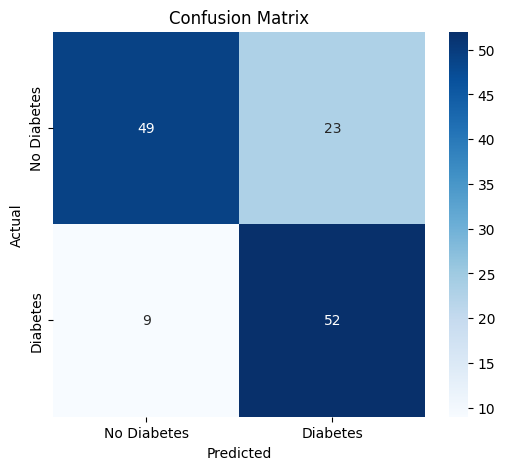

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



Model Evaluation:
Accuracy: 0.7444
Precision: 0.6901
Recall: 0.8033
F1 Score: 0.7424


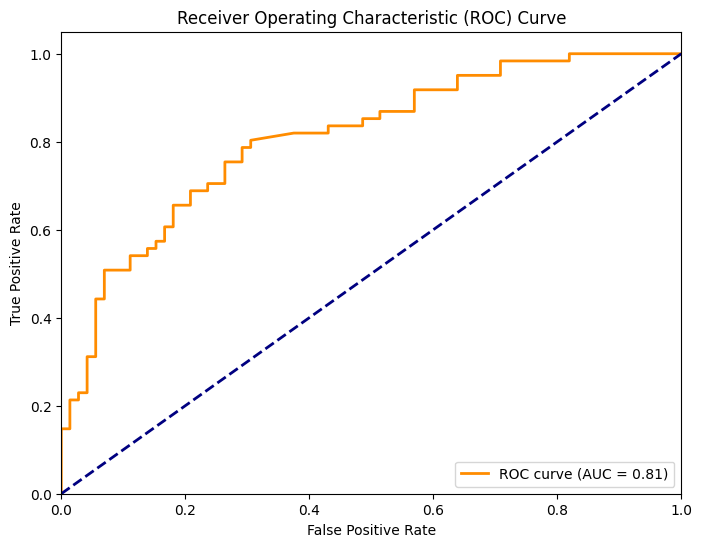

In [ ]:
# Initialize and train the Support Vector Classifier (SVC) model with RBF kernel
svc_model = SVC(kernel='poly', C=2.0, gamma=0.1, probability=True)  # Enable probability for ROC curve
svc_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svc_model.predict(X_test_scaled)
y_prob = svc_model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'\nModel Evaluation:')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Plotting the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



Model Evaluation:
Accuracy: 0.7594
Precision: 0.7302
Recall: 0.7541
F1 Score: 0.7419


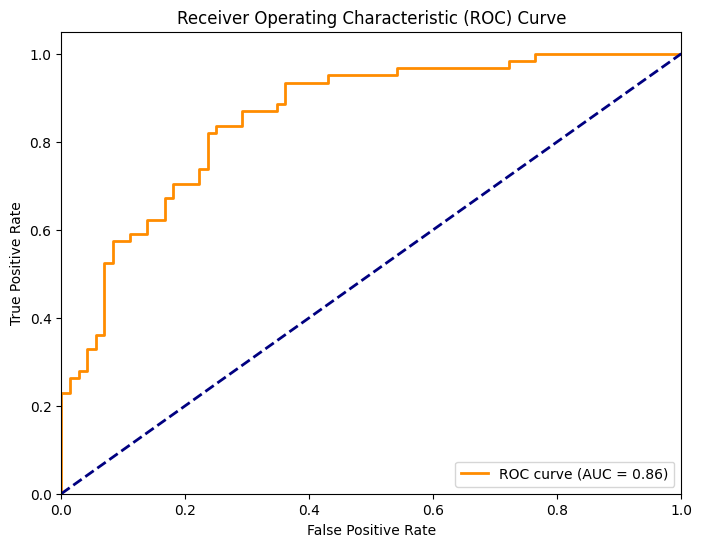

In [ ]:
# Initialize and train the Support Vector Classifier (SVC) model with RBF kernel
svc_model = SVC(kernel='linear', C=3.0, gamma=0.01, probability=True)  # Enable probability for ROC curve
svc_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svc_model.predict(X_test_scaled)
y_prob = svc_model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'\nModel Evaluation:')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Plotting the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
